# Capstone Project - The Battle of the Neighborhoods (Week 2)
## Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: Business Problem <a name="introduction"></a>

A description of the problem and a discussion of the background
As of 2016, Detroit has the fourth highest murder rate among major cities in the United States after St. Louis, Baltimore and New Orleans and the 42nd highest murder rate in the world. The crime rate has decreased over the years, but the city is overridden with economic downturns and high unemployment. This analysis will help local government agencies as well as tourists to identify geographical areas of interests. Government agencies will be able to make informed and focussed decisions to reap out desired outcomes more efficiently. The tourists will be aware of the areas that should be avoided for safe travel and stay. Enterpreneurs can also understand demographics of various areas around city to make better investments for growth and profits.

There are 100's, maybe even 1000's, of travel sites on the Internet, including FourSquare, that will tell you all about places to go, things to see, restaurants to eat at, bars to drink in, nightclubs to part the night away in and then where to go in the morning to get breakfast and a strong coffee. The problems with these sites is that they are one dimensional. If you want to find out all this information about a city you plan to visit next month, you have to do the hard work. Also, just because a venue is the hottest place to go for a night out does not always mean that the unwitting tourist should just ramble in unprepared. The areas surrounding this new venue might be riddled with crime including muggings, car theft and assault, for example. Approach the venue from any direction other than from the north and you could be putting your life in danger. This is when my idea comes in.

Imagine the following scenario:

Where to go(locality)?

Which areas are crime prone and require better supervison and monitoring?

### What do you do ... ?

#### Project Idea

My idea for the Capstone Project is to show that when driven by venue and location data from FourSquare, backed up with open source crime data, that it is possible to present the cautious and nervous traveller with a list of attractions to visit supplementd with a graphics showing the occurance of crime in the region of the venue.

A high level approach is as follows:

- The travellers decides on a city location [in this case Detroit]
- The ForeSquare website is scrapped for the venues in the city
- From this list of venues, the list is augmented with additional grographical data
- Using this additional geographical data the nearby places are selected
- The historical crime within a predetermined distance of all venues are obtained
- A map is presented to the to the traveller showing the selected venues and crime statistics of the area.

#### Beneficiaries

This solution is targeted for informed decision making. The want to see all the main sites of a city that they have never visited before but at the same time, for whatever reaons unknown, they want to be able to do all that they can to make sure that they stay clear of trouble i.e. is it safe to visit this venue.

Some examples of envisioned users include:

1. Government Agencies
2. Traveller
3. Enterpreneur

#### There are many data science aspect of this project including:

- Data Acquisition
- Data Cleansing
- Data Analysis
- Machine Learning

## Data <a name="data"></a>

In this section, I will describe the data used to solve the problem as described previously.

It is possible to attempt quite complex and sophisticated scenarios when approaching this problem. However, given the size of the project and for simplicity only the following scenario will be addressed:

1. Query the FourSqaure website for the top sites in Detroit

2. Use the FourSquare API to get supplemental geographical data about the sites

3. Use open source Detroit Crime data to provide the user with additional crime data

### Data Acquistion
The first phase of the project is to acquire all of the data that is needed for this project. The initial data required can be broken down into two separate data sets:

- The FourSquare Venues to Visit in Detroit
- The Detroit Police Department Crime Data

### Import Libraries

In this section we import the libraries that will be required to process the data.

**Pandas**.
Pandas is an open source, BSD-licensed library, providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Pandas will be used to house each of the data sets.

**Requests**. Requests is a Python HTTP library, released under the Apache2 License. The goal of the project is to make HTTP requests simpler and more human-friendly.

**BeautifulSoup**. Beautiful Soup is a Python package for parsing HTML and XML documents. It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.

**json** Library to handle JSON files

**Nominatim** Convert an address into latitude and longitude values

In [1]:
# Import Pandas to provide DataFrame support
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import Requests
import requests

# Import BeautifulSoup
from bs4 import BeautifulSoup

import json 

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim 

import requests #Send GET request and examine results

Solving environment: done

# All requested packages already installed.



### FourSquare Venues in Detroit

FourSquare does not actually provide an API that will return a list of the top venues to visit in a city. To get this list we can though use the FourSquare website directly to request the top sites in Detroit and then use BeautifulSoup to scrape the data we need. Once we have this starting data the other supplemental data we need to complete this dataset can be retrieved from using the FourSquare Venue API.

#### Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'Y5PGXOKZOSY5YPEH2DL3JY1DMADMGC5IYUOL2002DOQ2IAP3' # your Foursquare ID
CLIENT_SECRET = 'E3HPKJDZJMLJWV43GM5NSO32VPMQQBFMWHWC13EENQZ4FFQB' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50
radius = 50000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Y5PGXOKZOSY5YPEH2DL3JY1DMADMGC5IYUOL2002DOQ2IAP3
CLIENT_SECRET:E3HPKJDZJMLJWV43GM5NSO32VPMQQBFMWHWC13EENQZ4FFQB


### Get latitude and longitude of Detroit

In [3]:
address = 'Detroit'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


42.3315509 -83.0466403


Assign url for venues in Detroit to an object 

In [4]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=Y5PGXOKZOSY5YPEH2DL3JY1DMADMGC5IYUOL2002DOQ2IAP3&client_secret=E3HPKJDZJMLJWV43GM5NSO32VPMQQBFMWHWC13EENQZ4FFQB&ll=42.3315509,-83.0466403&v=20180604&radius=50000&limit=50'

In [5]:
results = requests.get(url).json()

In [6]:
results

{'meta': {'code': 200, 'requestId': '5d0a20f7a197930038b57471'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-456fd59ff964a520333e1fe3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d163941735',
         'name': 'Park',
         'pluralName': 'Parks',
         'primary': True,
         'shortName': 'Park'}],
       'id': '456fd59ff964a520333e1fe3',
       'location': {'address': 'Woodward Ave',
        'cc': 'US',
        'city': 'Detroit',
        'country': 'United States',
        'crossStreet': 'at Michigan Ave',
        'distance': 4,
        'formattedAddress': ['Woodward Ave (at Michigan Ave)',
         'Detroit, MI 48226',
         'United States'],
        'labeledLatLngs': [{'

From this HTML the following data will be extracted:

- Venue Name
- Venue Category
- Venue HREF
- Venue ID (Extracted from the HREF)

### Create Venues Dataframe

The venues list, a sample of which is shown above, only contains some of the data required. In addition to the attributes extracted directly from the HTML code the following attributes are also required:

- Venue Address
- Venue Postalcode
- Venue City
- Venue Latitude
- Venue Longitude

These attributes will be obtained directly from FourSquare using the venues API. The process is as follows:

1. Create a new empty Pandas dataframe to hold the data for the Top Venues
2. Extract the available attributes from the HTML code
3. For each venue
    - Contruct a URL to interagate the FourSquare Venue API for each site
    - Using the venues API and the URL request the data from FourSquare
    - Get the properly formatted address and the latitude and longitude data from the returned JSON
    - Write the data for each venue to the top venues dataframs

In [7]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'reasonName': 'globalInteractionReason',
    'summary': 'This spot is popular',
    'type': 'general'}]},
 'referralId': 'e-0-456fd59ff964a520333e1fe3-0',
 'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
     'suffix': '.png'},
    'id': '4bf58dd8d48988d163941735',
    'name': 'Park',
    'pluralName': 'Parks',
    'primary': True,
    'shortName': 'Park'}],
  'id': '456fd59ff964a520333e1fe3',
  'location': {'address': 'Woodward Ave',
   'cc': 'US',
   'city': 'Detroit',
   'country': 'United States',
   'crossStreet': 'at Michigan Ave',
   'distance': 4,
   'formattedAddress': ['Woodward Ave (at Michigan Ave)',
    'Detroit, MI 48226',
    'United States'],
   'labeledLatLngs': [{'label': 'display',
     'lat': 42.33157500935305,
     'lng': -83.04659843444824}],
   'lat': 42.33157500935305,
   'lng': -83.04659843444824,
   'postalCode': '48226',
   'state': 'MI'},
  'name': 'Campus Marti

#### Process JSON and convert it to a clean dataframe

In [8]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [9]:
dataframe = json_normalize(items) # flatten JSON
dataframe.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.delivery.id,venue.delivery.provider.icon.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.name,venue.delivery.url,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'type': 'general', 'reasonName': 'globalInte...",e-0-456fd59ff964a520333e1fe3-0,"[{'shortName': 'Park', 'id': '4bf58dd8d48988d1...",NaN,NaN,NaN,NaN,NaN,NaN,456fd59ff964a520333e1fe3,Woodward Ave,US,Detroit,United States,at Michigan Ave,4,"[Woodward Ave (at Michigan Ave), Detroit, MI 4...","[{'lng': -83.04659843444824, 'lat': 42.3315750...",42.331575,-83.046598,NaN,48226,MI,Campus Martius,0,[],NaN
1,0,"[{'type': 'general', 'reasonName': 'globalInte...",e-0-4a64d346f964a520c6c61fe3-1,"[{'shortName': 'Waterfront', 'id': '56aa371be4...",NaN,NaN,NaN,NaN,NaN,NaN,4a64d346f964a520c6c61fe3,Atwater St,US,Detroit,United States,at Civic Center Dr,600,"[Atwater St (at Civic Center Dr), Detroit, MI ...","[{'lng': -83.04410934448242, 'lat': 42.3264907...",42.326491,-83.044109,NaN,48226,MI,Detroit RiverWalk,0,[],NaN
2,0,"[{'type': 'general', 'reasonName': 'globalInte...",e-0-53b98b96498ef894b65e877c-2,"[{'shortName': 'Cocktail', 'id': '4bf58dd8d489...",609876,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/wright--com...,53b98b96498ef894b65e877c,1500 Woodward Ave Fl 2,US,Detroit,United States,at John R St,439,"[1500 Woodward Ave Fl 2 (at John R St), Detroi...","[{'lng': -83.04922957158983, 'lat': 42.3350004...",42.335000,-83.049230,NaN,48226,MI,Wright & Co.,0,[],NaN
3,0,"[{'type': 'general', 'reasonName': 'globalInte...",e-0-58ef8f318f2c1a27684b29cb-3,"[{'shortName': 'Café', 'id': '4bf58dd8d48988d1...",NaN,NaN,NaN,NaN,NaN,NaN,58ef8f318f2c1a27684b29cb,1049 Woodward,US,Detroit,United States,NaN,167,"[1049 Woodward, Detroit, MI 48226, United States]","[{'lng': -83.04769430603542, 'lat': 42.3328340...",42.332834,-83.047694,NaN,48226,MI,Avalon Cafe and Bakery,0,[],NaN
4,0,"[{'type': 'general', 'reasonName': 'globalInte...",e-0-4ae4de7df964a520f59e21e3-4,"[{'shortName': 'Theater', 'id': '4bf58dd8d4898...",NaN,NaN,NaN,NaN,NaN,NaN,4ae4de7df964a520f59e21e3,2211 Woodward Ave,US,Detroit,United States,at Montcalm St.,905,"[2211 Woodward Ave (at Montcalm St.), Detroit,...","[{'lng': -83.05218121411987, 'lat': 42.3385795...",42.338580,-83.052181,NaN,48201,MI,Fox Theatre,0,[],33279924


In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Campus Martius,Park,Woodward Ave,US,Detroit,United States,at Michigan Ave,4,"[Woodward Ave (at Michigan Ave), Detroit, MI 4...","[{'lng': -83.04659843444824, 'lat': 42.3315750...",42.331575,-83.046598,NaN,48226,MI,456fd59ff964a520333e1fe3
1,Detroit RiverWalk,Waterfront,Atwater St,US,Detroit,United States,at Civic Center Dr,600,"[Atwater St (at Civic Center Dr), Detroit, MI ...","[{'lng': -83.04410934448242, 'lat': 42.3264907...",42.326491,-83.044109,NaN,48226,MI,4a64d346f964a520c6c61fe3
2,Wright & Co.,Cocktail Bar,1500 Woodward Ave Fl 2,US,Detroit,United States,at John R St,439,"[1500 Woodward Ave Fl 2 (at John R St), Detroi...","[{'lng': -83.04922957158983, 'lat': 42.3350004...",42.335000,-83.049230,NaN,48226,MI,53b98b96498ef894b65e877c
3,Avalon Cafe and Bakery,Café,1049 Woodward,US,Detroit,United States,NaN,167,"[1049 Woodward, Detroit, MI 48226, United States]","[{'lng': -83.04769430603542, 'lat': 42.3328340...",42.332834,-83.047694,NaN,48226,MI,58ef8f318f2c1a27684b29cb
4,Fox Theatre,Theater,2211 Woodward Ave,US,Detroit,United States,at Montcalm St.,905,"[2211 Woodward Ave (at Montcalm St.), Detroit,...","[{'lng': -83.05218121411987, 'lat': 42.3385795...",42.338580,-83.052181,NaN,48201,MI,4ae4de7df964a520f59e21e3
5,Detroit Athletic Club (DAC),Gym,241 Madison St,US,Detroit,United States,NaN,639,"[241 Madison St, Detroit, MI 48226, United Sta...","[{'lng': -83.0470674164324, 'lat': 42.33728538...",42.337285,-83.047067,NaN,48226,MI,4b5da7a7f964a520546529e3
6,The Belt,Art Gallery,NaN,US,Detroit,United States,NaN,318,"[Detroit, MI, United States]","[{'lng': -83.04608664518477, 'lat': 42.3343862...",42.334386,-83.046087,NaN,NaN,MI,55bd50ef498ed9ea3ebec47b
7,Comerica Park,Baseball Stadium,2100 Woodward Ave,US,Detroit,United States,NaN,880,"[2100 Woodward Ave, Detroit, MI 48201, United ...",NaN,42.339241,-83.049140,NaN,48201,MI,4b15507bf964a520a7b023e3
8,The Fillmore Detroit,Concert Hall,2115 Woodward Ave,US,Detroit,United States,at W Elizabeth St.,813,"[2115 Woodward Ave (at W Elizabeth St.), Detro...","[{'lng': -83.05232412319816, 'lat': 42.3375262...",42.337526,-83.052324,NaN,48201,MI,4aac7b54f964a520195e20e3
9,Windsor Riverwalk,Park,Ouellette Ave.,CA,Windsor,Canada,NaN,1385,"[Ouellette Ave., Windsor ON, Canada]","[{'lng': -83.04198503494263, 'lat': 42.3195895...",42.319590,-83.041985,NaN,NaN,ON,4b96d534f964a52096e734e3


In [11]:
# Verify the shape of the venues dataframe
dataframe_filtered.shape

(50, 16)

In [12]:
# Verify the dtypes of the venues dataframe
dataframe_filtered.dtypes

name                 object
categories           object
address              object
cc                   object
city                 object
country              object
crossStreet          object
distance              int64
formattedAddress     object
labeledLatLngs       object
lat                 float64
lng                 float64
neighborhood         object
postalCode           object
state                object
id                   object
dtype: object

#### Removing the irrelevant columns

In [13]:
dataframe_filtered.drop(['country','crossStreet','labeledLatLngs','formattedAddress','cc'], axis = 1, inplace=True)


In [14]:
dataframe_filtered.head()

,name,categories,address,city,distance,lat,lng,neighborhood,postalCode,state,id
0,Campus Martius,Park,Woodward Ave,Detroit,4,42.331575,-83.046598,NaN,48226,MI,456fd59ff964a520333e1fe3
1,Detroit RiverWalk,Waterfront,Atwater St,Detroit,600,42.326491,-83.044109,NaN,48226,MI,4a64d346f964a520c6c61fe3
2,Wright & Co.,Cocktail Bar,1500 Woodward Ave Fl 2,Detroit,439,42.335000,-83.049230,NaN,48226,MI,53b98b96498ef894b65e877c
3,Avalon Cafe and Bakery,Café,1049 Woodward,Detroit,167,42.332834,-83.047694,NaN,48226,MI,58ef8f318f2c1a27684b29cb
4,Fox Theatre,Theater,2211 Woodward Ave,Detroit,905,42.338580,-83.052181,NaN,48201,MI,4ae4de7df964a520f59e21e3


## Import and process the Detroit Crime DataSet

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Detroit in the last year, minus the most recent seven days. Data is extracted from the Detroit Police Department's open data platform. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified.

### Import the 2018 DataSet

The full dataset contains crime data from 2016 to present.. The following clean-up steps are required:

Not all of the columns are required. The following columns are kept:
- Crime ID 
- Incident Date & Time
- Neighborhood
- Latitude
- Longitude

In [15]:
# These are the columns that we want to keep.
# Columns not listed here won't be imported, speeding things up.
crime_keep_columns = ['Crime ID',
                      'Incident Date & Time',
                      'Offense Category',
                      'Neighborhood',
                      'Latitude',
                      'Longitude']

### Read cvs download into datafram

In [16]:
url = 'https://data.detroitmi.gov/api/views/6gdg-y3kf/rows.csv?accessType=DOWNLOAD'

In [17]:
df_detroit_crime = pd.read_csv(url,usecols=crime_keep_columns)

Looking at the Shape of df we can see that only 6 columns have been imported instead of all.

In [18]:
df_detroit_crime.shape

(208716, 6)

Let's have a quick look at the Head and tail of the imported data

In [19]:
df_detroit_crime.head()

,Crime ID,Offense Category,Incident Date & Time,Neighborhood,Longitude,Latitude
0,3372082,LARCENY,06/17/2019 07:00:00 AM,Outer Drive-Hayes,-82.962068,42.417754
1,3372058,DAMAGE TO PROPERTY,06/17/2019 05:51:00 AM,Midwest,-83.113531,42.355217
2,3372054,LARCENY,06/17/2019 05:34:00 AM,Seven Mile-Rouge,-83.272280,42.429002
3,3372059,LARCENY,06/17/2019 05:02:00 AM,Warrendale,-83.216817,42.343297
4,3372059,AGGRAVATED ASSAULT,06/17/2019 05:02:00 AM,Warrendale,-83.216817,42.343297


In [20]:
df_detroit_crime.tail()

,Crime ID,Offense Category,Incident Date & Time,Neighborhood,Longitude,Latitude
208711,3114653,SEXUAL ASSAULT,06/01/1973 12:00:00 PM,Plymouth-I96,-83.207160,42.372776
208712,3245175,SEXUAL ASSAULT,01/01/1973 12:00:00 AM,LaSalle College Park,-83.010296,42.417911
208713,3162921,DAMAGE TO PROPERTY,01/06/1963 12:10:00 PM,Springwells,-83.123132,42.308763
208714,3172333,LARCENY,02/01/1951 12:00:00 PM,Jeffries,-83.071149,42.345397
208715,3201834,LARCENY,04/22/1920 12:30:00 AM,Nortown,-83.034145,42.437363


### Clean up the data and prepare

Clean up the column names:
- Strip leading & trailing whitespace
- Replace multiple spaces with a single space
- Remove # characters
- Replace spaces with _
- Convert to lowercase
- Change the date of occurance field to a date / time object

Add new columns for:
- Hour
- Day
- Month
- Year
- etc.

Split Block into zip_code and street

Verify that all rows have valid data

In [21]:
# Strip leading & trailing whitespace
df_detroit_crime.columns = df_detroit_crime.columns.str.strip()

# Replace multiple spaces with a single space
df_detroit_crime.columns = df_detroit_crime.columns.str.replace('\s{2,}', ' ')

# Replace # with blank
df_detroit_crime.columns = df_detroit_crime.columns.str.replace('#', '')

# Replace spaces with _
df_detroit_crime.columns = df_detroit_crime.columns.str.replace(' ', '_')

# Convert to lowercase
df_detroit_crime.columns = df_detroit_crime.columns.str.lower()


In [22]:
# Verify that all datatype are as expected
df_detroit_crime.dtypes

crime_id                  int64
offense_category         object
incident_date_&_time     object
neighborhood             object
longitude               float64
latitude                float64
dtype: object

Change the date of occurance field to a date / time object

In [23]:
df_detroit_crime['incident_date_&_time'] =  pd.to_datetime(df_detroit_crime['incident_date_&_time'], format='%m/%d/%Y %I:%M:%S %p')

Now that the date date of the crime is a real date time object let's add new columns for the hour, day, month and year of the crime etc:

Hour

Day of week (Tuesday is the first day)

Month Number

Year

Year and Month

In [24]:
# Add new columns to the dataframe to allow hourly, daily & monthly analysis
df_detroit_crime['hour'] = df_detroit_crime['incident_date_&_time'].dt.hour
df_detroit_crime['day'] = df_detroit_crime['incident_date_&_time'].dt.dayofweek + 1
df_detroit_crime['month'] = df_detroit_crime['incident_date_&_time'].dt.month
df_detroit_crime['year'] = df_detroit_crime['incident_date_&_time'].dt.year
df_detroit_crime['year_month'] = df_detroit_crime['incident_date_&_time'].dt.to_period('M')

Verify that all rows have valid data

In [25]:
# Verify that all rows have valid data
df_detroit_crime.isna().sum()

crime_id                   0
offense_category           0
incident_date_&_time       0
neighborhood            2969
longitude               1188
latitude                1188
hour                       0
day                        0
month                      0
year                       0
year_month                 0
dtype: int64

Some Neighborhood, Latitude and Longitude values are missing, drop them.

In [26]:
# Drop rows with missing values 
df_detroit_crime.dropna(inplace=True)

In [27]:
# Reindex
df_detroit_crime.reset_index(inplace=True)

In [28]:
# Have a final look at the crime dataframe
df_detroit_crime.head()

,index,crime_id,offense_category,incident_date_&_time,neighborhood,longitude,latitude,hour,day,month,year,year_month
0,0,3372082,LARCENY,2019-06-17 07:00:00,Outer Drive-Hayes,-82.962068,42.417754,7,1,6,2019,2019-06
1,1,3372058,DAMAGE TO PROPERTY,2019-06-17 05:51:00,Midwest,-83.113531,42.355217,5,1,6,2019,2019-06
2,2,3372054,LARCENY,2019-06-17 05:34:00,Seven Mile-Rouge,-83.272280,42.429002,5,1,6,2019,2019-06
3,3,3372059,LARCENY,2019-06-17 05:02:00,Warrendale,-83.216817,42.343297,5,1,6,2019,2019-06
4,4,3372059,AGGRAVATED ASSAULT,2019-06-17 05:02:00,Warrendale,-83.216817,42.343297,5,1,6,2019,2019-06


## Visualising The Detroit Crime Data

In [29]:
# Import Pandas
import pandas as pd

# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

font = {'size'   : 14}
mpl.rc('font', **font)

# Use Folium to display the Maps for Visualisation
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins

Solving environment: done

# All requested packages already installed.



### Number of Crimes per year

Text(0,1,'Count of Crimes Per Year')

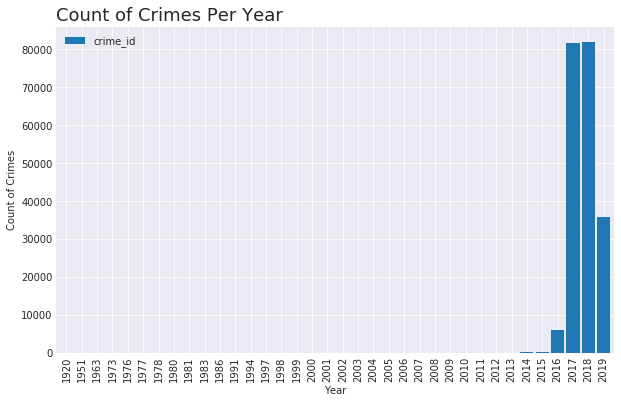

In [30]:
# Group the Crimes per year and produce a bar chart
df_crimes = df_detroit_crime
# Group the Crimes per month and produce a bar chart
df_crimes.groupby('year').count().plot(y = 'crime_id', 
                                             kind='bar',
                                             figsize=(10,6),
                                             width=0.85,
                                             colormap='tab20')

plt.xlabel('Year')
plt.ylabel('Count of Crimes')
plt.title('Count of Crimes Per Year', loc='left', fontsize=18)


With the advent of technology in crime reporting, the number of reported crimes per year has increased. 

##### There is a sharp increase in vear 2016 and 2017, Please note -  For 2019, it is mid year report

### Number of crimes occuring on each day

Text(0,1,'Count of Crimes Per Day of Week [1 is a SUNDAY]')

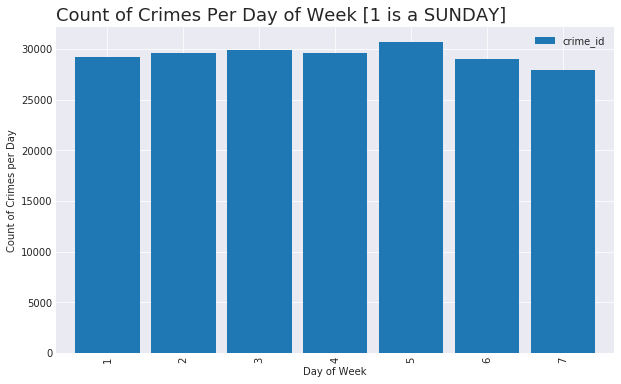

In [31]:
# Group the Crimes per day and produce a bar chart
df_crimes.groupby('day').count().plot(y = 'crime_id',
                                      kind='bar',
                                      figsize=(10,6),
                                      width=0.85,
                                      colormap='tab20')
plt.xlabel('Day of Week')
plt.ylabel('Count of Crimes per Day')
plt.title('Count of Crimes Per Day of Week [1 is a SUNDAY]', loc='left', fontsize=18)

There is small increase in crimes on Thursday, which is suprising as crimes rate is expected to be higher on weekends. Though the difference is too small to be significant. 

### Number of crimes occuring in each hour

Text(0,1,'Count of Crimes Per Hour')

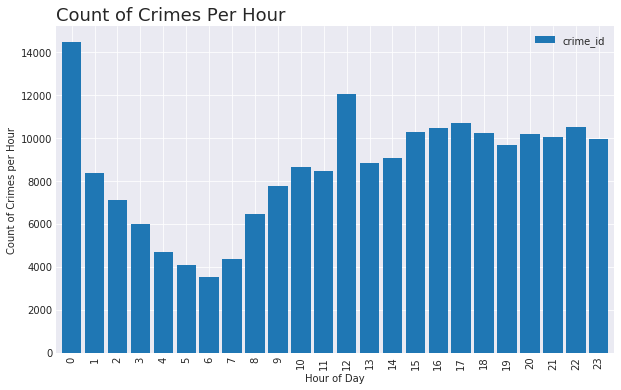

In [32]:
# Group the Crimes per hour and produce a bar chart
df_crimes.groupby('hour').count().plot(y = 'crime_id',
                                       kind='bar',
                                       figsize=(10,6),
                                       width=0.85,
                                       colormap='tab20')

plt.xlabel('Hour of Day')
plt.ylabel('Count of Crimes per Hour')
plt.title('Count of Crimes Per Hour', loc='left', fontsize=18)

There is an expected fall-off in reported crime rates after midnight before elevating again after six in the morning. There appears to be a spike around midday.

## Now let's look at the Crime Categories.

In [33]:
# Number of unique Crime categories bases on the Primary Description
df_crimes.offense_category.nunique()

30

In [34]:
# What Crimes are the 10 most commonly occuring ones 
df_crimes[['offense_category', 'crime_id']].groupby(
    ['offense_category'], as_index=False).count().sort_values(
    'crime_id', ascending=False).head(10)

,offense_category,crime_id
2,ASSAULT,35179
15,LARCENY,33403
4,DAMAGE TO PROPERTY,24600
0,AGGRAVATED ASSAULT,20471
3,BURGLARY,19892
28,STOLEN VEHICLE,17338
10,FRAUD,16179
5,DANGEROUS DRUGS,6331
22,ROBBERY,5916
29,WEAPONS OFFENSES,4156


In [35]:
# What Crimes are the 3 most commonly occuring ones 
df_crimes[['offense_category', 'crime_id']].groupby(
    ['offense_category'], as_index=False).count().sort_values(
    'crime_id', ascending=False).head(3)

,offense_category,crime_id
2,ASSAULT,35179
15,LARCENY,33403
4,DAMAGE TO PROPERTY,24600


In [36]:
# Create a list of the 3 most commonly occuring crimes
top_ten_crimes = df_crimes[['offense_category', 'crime_id']].groupby(
    ['offense_category']).count().sort_values('crime_id', ascending=False)[:10].axes[0].tolist()

# Create a list of the 3 most commonly occuring crimes
top_three_crimes = df_crimes[['offense_category', 'crime_id']].groupby(
    ['offense_category']).count().sort_values('crime_id', ascending=False)[:3].axes[0].tolist()

In order to get a better understanding of the top three crimes lets first create smaller dataframe the only contains these top crimes. Next we'll visualise these crimes using area charts.

Text(0,1,'Count of Top 3 Crimes Per Month')

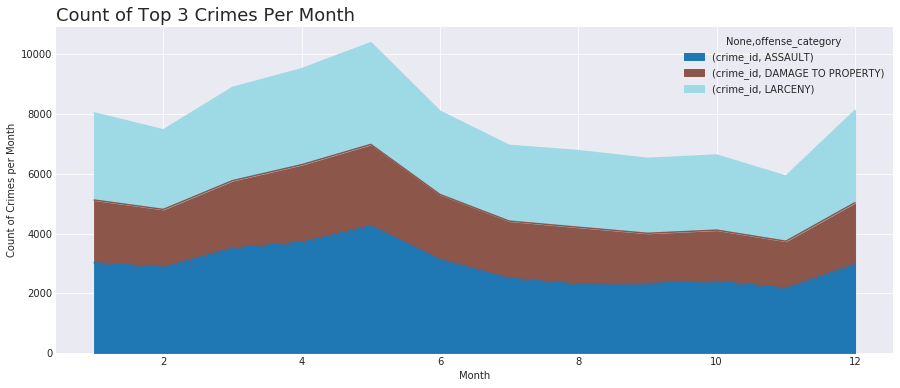

In [37]:
# Create a new data frame with just the top 10 crimes
df_top10_crimes = df_crimes[df_crimes['offense_category'].isin(top_ten_crimes)].copy()

# Create a new data frame with just the top 3 crimes
df_top3_crimes = df_crimes[df_crimes['offense_category'].isin(top_three_crimes)].copy()

# Create a pivot area chart of the crimes per month
df_top3_crimes[['crime_id', 'offense_category', 'month']].pivot_table(
    index='month', 
    columns='offense_category', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Month')
plt.ylabel('Count of Crimes per Month')
plt.title('Count of Top 3 Crimes Per Month', loc='left', fontsize=18)

This suggests that crime rates peak in May and June.

Text(0,1,'Count of Top 3 Crimes Per Day')

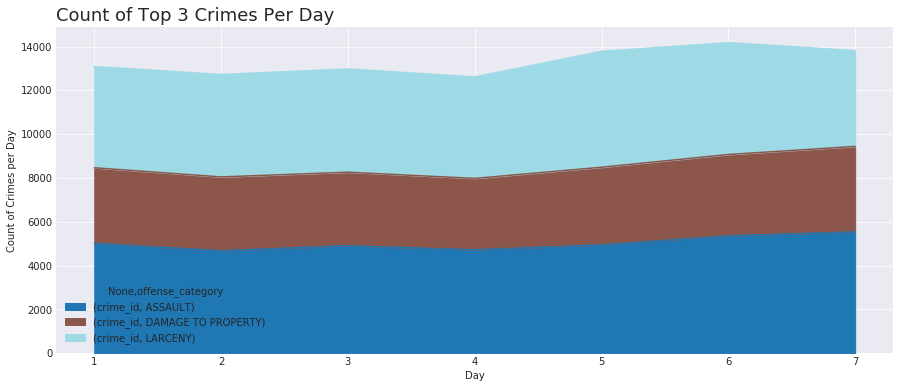

In [38]:
# Create a pivot area chart of the crimes per day
df_top3_crimes[['crime_id', 'offense_category', 'day']].pivot_table(
    index='day', 
    columns='offense_category', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Day')
plt.ylabel('Count of Crimes per Day')
plt.title('Count of Top 3 Crimes Per Day', loc='left', fontsize=18)

This suggests that second half of weak have higher crime rates than first half

Text(0,1,'Count of Top 3 Crimes Per Hour')

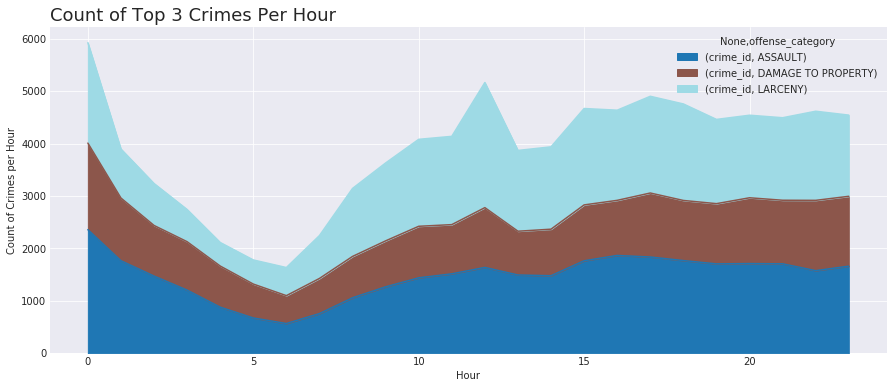

In [39]:
# Create a pivot area chart of the crimes per hour
df_top3_crimes[['crime_id', 'offense_category', 'hour']].pivot_table(
    index='hour', 
    columns='offense_category', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Hour')
plt.ylabel('Count of Crimes per Hour')
plt.title('Count of Top 3 Crimes Per Hour', loc='left', fontsize=18)

This suggests that morning 5am is the safest time in Detroit, midnight and 12 noon being the most unsafe time.

## Create a folium map with a different colour per crime

Colour each of the top 10 crimes with a different and plot on a Folium map.

In [40]:
# Create a list of 10 colours. 
# We have  list of the top 10 crimes from earlier
colors10 = [
    'red',
    'blue',
    'gray',
    'orange',
    'beige',
    'green',
    'purple',
    'pink',
    'cadetblue',
    'black'
]

# Create a dictionary of colours to map to the crimes
dict_colours10 = dict(zip(top_ten_crimes, colors10))

# Create a list of 3 colours. 
# We have  list of the top 3 crimes from earlier
colors3 = [
    'red',
    'blue',
    'green'
]

# Create a dictionary of colours to map to the crimes
dict_colours3 = dict(zip(top_three_crimes, colors3))

The entire df_top3_crimes DataFrame contains too many point to disply effeciently using Folium. To combat this we will just use the data from July 2018 in which crime happened at noon.

In [41]:
# Add the colours colums to the df_top_crimes DataFrame
df_top10_crimes['colour'] = df_top10_crimes.offense_category.map(dict_colours10)

# Filter the top 10 crimes dataframe to extract from noon in June,2018 only
df_top10_crimes_2018 = df_top10_crimes[df_top10_crimes.year == 2018]

df_top10_crimes_2018_june = df_top10_crimes_2018[df_top10_crimes_2018.month == 6]

df_top10_crimes_2018_june_noon = df_top10_crimes_2018_june[df_top10_crimes_2018_june.hour == 12]

# Add the colours colums to the df_top_crimes DataFrame
df_top3_crimes['colour'] = df_top3_crimes.offense_category.map(dict_colours3)

# Filter the top 10 crimes dataframe to extract from noon in June,2018 only
df_top3_crimes_2018 = df_top3_crimes[df_top3_crimes.year == 2018]

df_top3_crimes_2018_june = df_top3_crimes_2018[df_top3_crimes_2018.month == 6]

df_top3_crimes_2018_june_noon = df_top3_crimes_2018_june[df_top3_crimes_2018_june.hour == 12]

Now that the dataframe of crimes with colour has been created all the remains is to generate the Folium Plots

#### Marker Map of the Top 10 Crimes that happened in noon in June,2018

In [42]:
# Define Detroit's geolocation coordinates
detroit_latitude = latitude  
detroit_longitude = longitude

!pip install -U folium

Requirement already up-to-date: folium in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (0.9.1)
Requirement not upgraded as not directly required: branca>=0.3.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium) (0.3.1)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium) (2.18.4)
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium) (1.13.3)
Requirement not upgraded as not directly required: jinja2>=2.9 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium) (2.9.6)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from branca>=0.3.0->folium) (1.11.0)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests->folium) (3.0.4)


In [43]:
# Define the world map centered around Detroit with a higher zoom level
detroit_map = folium.Map(location=[detroit_latitude, detroit_longitude], zoom_start=11)

# display world map
detroit_map


In [44]:
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the crimes and add each to the incidents feature group
for lat, lng, col in zip(df_top10_crimes_2018_june_noon.latitude, 
                         df_top10_crimes_2018_june_noon.longitude, 
                         df_top10_crimes_2018_june_noon.colour):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color=col,
            fill=True,
            fill_color=col,
            fill_opacity=0.6
        )
    )

# add incidents to map
detroit_map.add_child(incidents)
detroit_map

AttributeError: module 'folium.features' has no attribute 'CircleMarker'

In the map above the crimes data for noon in June,2018, was super-imposed over a map of Detroit to visualise the distribution of that data. The higher frequency of the top two crimes can be easily seen. Red for Theft and Blue for Battery.

Next the same data was added to a Cluster Map.

In [ ]:
mc = MarkerCluster()

# Define the world map centered around Chicago with a higher zoom level
detroit_cluster = folium.Map(location=[detroit_latitude, detroit_longitude], zoom_start=11)

# display world map
detroit_cluster

#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in df_top10_crimes_2018_june_noon.itertuples():
    mc.add_child(folium.Marker(
        location=[row.latitude,  row.longitude],
                 popup=row.offense_category))
 
detroit_cluster.add_child(mc)
detroit_cluster

Several obvious clusters of crime locations were visible, particularly around the periphery of Detroit.

Finally a heat map of the noon in June,2018 crimes was created.

In [ ]:
from folium import plugins
from folium.plugins import HeatMap

detroit_heatmat = folium.Map(location=[detroit_latitude, detroit_longitude], zoom_start=11) 

# List comprehension to make out list of lists
heat_data = [[row['latitude'], 
              row['longitude']] for index, row in df_top10_crimes_2018_june_noon.iterrows()]

# Plot it on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(detroit_heatmat)

# Display the map
detroit_heatmat

This reinforces the cluster chart where it can clearly be seen that the center of Detroit and the area around Greektown and Macomb street have a high crime rate occurrence.

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of Detroit that are crime prone, particularly those with that happened in 2018. We will limit our analysis to area ~50km around city center.

In first step we have collected the required data: 
1. location and type (category) of every top venue within 50km from Detroit center.
2. crime data from Detroit PD open data portal

Second step in our analysis will be calculation and exploration of 'crime density' across different areas of Detroit - we will use heatmaps to identify a few promising areas close to center with high number of crimes in general and focus our attention on those areas where crime happened in June 2018 at noon.

Next, we will conduct some inferential statistics on data to understand the following:

- Which months are prone to higher crime rates? (Scatter plot)
- Which days of week are prone to higher crime rates? (Scatter plot)

Finally, we will create a model to predict crime in Detroit by evaluating different models and picking the best model. The different methods used are:

- Logistic Regression
- K Nearest Neighbor(KNN)
- Decision Tree
- Random Forest

## Analysis <a name="Analysis"></a>

## Inferential Statistics


In this section we will investigate if there are any obvious inferential statisticical methods that can help us when modelling the data.

### Import required Libraries

In [ ]:
# Import Pandas
import pandas as pd

# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

font = {'size'   : 14}
mpl.rc('font', **font)

#### Scatter plot

In [ ]:
df_top10_crimes.head()

In [ ]:
df_detroit_crime.plot.scatter('month', 'year', figsize=(10,6))

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Scatter Plot of Top Crimes Month and Year', loc='left', fontsize=18)

The above graph show that there were isolated rare incidences of crime during 1920. But after 2000, incidences of crime has been almost same across year. January being the most dangerous month

In [ ]:
df_detroit_crime.plot.scatter('day', 'year', figsize=(10,6))

plt.xlabel('Day')
plt.ylabel('Year')
plt.title('Scatter Plot of Top Crimes Day and Year', loc='left', fontsize=18)

The above plot suggests that Wednesday has been the most dangerous day from 1920 to present in Detroit.

## Model Creation and Evaluation

In this section multiple models will be created and evaluated before a final model is chosen and evaluated.

### Import Libraries


In [ ]:
#import numpy
import numpy as np

# All the SciKit Learn Libraries Required
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

# Decision Tree
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier

# Small Function to do X-Fold Cross Validation
def cross_validate(model, n_splits = 10):
    
    k_fold = KFold(n_splits = n_splits)
    scores = [model.fit(X[train], y[train]).score(X[test], y[test]) for train, test in k_fold.split(X)]
    
    scores = np.percentile(scores, [40, 50, 60])
    return scores

In [ ]:
# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

font = {'size'   : 12}
mpl.rc('font', **font)

## Data Preparation for Modelling

Before we start modelling we need to prepare the data frame to include only numerical data and by removing unneeded columns.

Rather than removing colums from df_top10_crimes_2018_june a new df_features DataFrame will be created with just the required columns. This df_features DataFrame will then be processed to remove Categorical Data Types and replace them with One Hot encoding. Finally the Dependant Variables will be Normalised.

Smaller dataframe for 2018 - June only

In [ ]:
# Start by copying the Latitude and Longitude to the new DataFrame
df_features = df_top10_crimes_2018_june[['latitude', 'longitude']]

# Next and One Hot Encoding of the hour, day and month variables
df_features = df_features.join(pd.get_dummies(df_top10_crimes_2018_june.hour,prefix='hour'))
df_features = df_features.join(pd.get_dummies(df_top10_crimes_2018_june.day,prefix='day'))
df_features = df_features.join(pd.get_dummies(df_top10_crimes_2018_june.month,prefix='month'))

# Finally add the ward & crimes column, copied from the original Primary Description column
df_features['crimes'] = df_crimes[['offense_category']]

In [ ]:
df_features.head()

There are a couple of further small changes to be made:

- Create the X, dependant variables, DataFrames by dropping the Crimes column
- Create the y, independant variable,
- Normailse the X Data

In [ ]:
X = df_features.copy()
y = X.crimes.values

X.drop('crimes', axis=1, inplace=True)
X = preprocessing.StandardScaler().fit(X).transform(X)

### K Nearest Neighbor(KNN)

Find the best k to build the model with the best accuracy.

In [ ]:
# Number of neighbours
neighs = range(8, 13)

# Store the scores
scores = np.zeros((len(neighs), 3))

# Iterate to find the best model
for idx, neigh in enumerate(neighs):
    print('Heighbours: ', neigh, ' ', str(datetime.now()))
    model = KNeighborsClassifier(n_neighbors = neigh)
    scores[idx, : ] = cross_validate(model, n_splits = 10)

# Plot the results
plt.plot(neighs, scores[ : , 1], 'b')
plt.fill_between(neighs, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()

K = 11 give the best results

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors = 11).fit(X, y)

## Decision Tree

In [ ]:
# Decision Tree
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier

# Depth of the Decision Trees
depths = range(12, 18)

# Store the scores
scores = np.zeros((len(depths), 3))

# Iterate to find the best model
for idx, depth in enumerate(depths):
    print('Depth: ', depth, ' ', str(datetime.now()))
    model = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
    scores[idx, : ] = cross_validate(model, n_splits = 10)

# Plot the results
plt.plot(depths, scores[ : , 1], 'b')
plt.fill_between(depths, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.tight_layout()
plt.show()

Depth = 12 gives the best results

In [ ]:
Tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 12).fit(X, y)

## Logistic Regression

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

C = np.logspace(-2.0, 0.5, num = 6, endpoint = True)

scores = np.zeros((len(C), 3))

for idx, c in enumerate(C):
    print('C: ', c, ' ', str(datetime.now()))
    model = LogisticRegression(C = c, solver = 'liblinear')
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(C, scores[ : , 1], 'b')
plt.xscale('log')
plt.fill_between(C, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.tight_layout()
plt.show()

In [ ]:
LR_model = LogisticRegression(C = 0.1, solver = 'liblinear').fit(X, y)

## Decision Forest using a Random Forest

In [ ]:
est = range(20, 24)
scores = np.zeros((len(est), 3))
for idx, a in enumerate(est):
    print('Estimator: ', a, ' ', str(datetime.now()))
    model = RandomForestClassifier(n_estimators = a, max_features = 'sqrt')
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(est, scores[ : , 1], 'b')
plt.fill_between(est, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()

In [ ]:
Forest_model = RandomForestClassifier(n_estimators = 21, max_features = 'sqrt').fit(X, y)


## Best Model

Random Forest is the best model scoring highest in all measurements, F1-Score, Jaccard and Log Loss. Let's now create a new model. The June,2018(hour = 6) crime data will become the unseen test data for the final model. 

#### Recreate the Features DataFrame

In [ ]:
# Start by copying the Latitude and Longitude to the new DataFrame
df_features = df_top10_crimes_2018_june[['latitude', 'longitude']]

# Next and One Hot Encoding of the hour, day and month variables
df_features = df_features.join(pd.get_dummies(df_top10_crimes_2018_june.hour,prefix='hour'))
df_features = df_features.join(pd.get_dummies(df_top10_crimes_2018_june.day,prefix='day'))
df_features = df_features.join(pd.get_dummies(df_top10_crimes_2018_june.month,prefix='month'))

# Finally add the ward & crimes column, copied from the original Primary Description column
df_features['crimes'] = df_crimes[['offense_category']]



In [ ]:
# Looking at the head of the features dataframe we can see the encoded labels
df_features.head()

In [ ]:
df_features.dtypes

### Create the Test Datasets

In [ ]:
X_Train = df_features[df_features.day_6 == 0].copy()
X_Train.drop('crimes', axis=1, inplace=True)

# Normalise df_features
X_Train = preprocessing.StandardScaler().fit(X_Train).transform(X_Train)

y_Train = df_features.crimes[df_features.day_6 == 0].values

### Create the Train Datasets

In [ ]:
X_Test = df_features[df_features.day_6 == 1].copy()
X_Test.drop('crimes', axis=1, inplace=True)

# Normalise df_features
X_Test = preprocessing.StandardScaler().fit(X_Test).transform(X_Test)

y_Test = df_features.crimes[df_features.day_6 == 1].values

### Recreate the Random Forest Model

In [ ]:
Forest_model_final = RandomForestClassifier(n_estimators = 22, max_features = 'sqrt').fit(X_Train, y_Train)

### Predict the Final Performance of the Model

In [ ]:
# Predict yhat using X_Test
yhat = Forest_model_final.predict(X_Test)
    
# Measure the Jaccard Score of the final Model
jaccard_final = metrics.jaccard_similarity_score(y_Test, yhat)
print('Jaccard Score', jaccard_final)
    
f1 = metrics.f1_score(y_Test, yhat, average=None)
print('F1-Score of each class', f1)

### What are the important Features

In [ ]:
importances = Forest_model_final.feature_importances_

In [ ]:
std = np.std([tree.feature_importances_ for tree in Forest_model_final.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_Train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15, 6))
plt.title("Feature importances")
plt.bar(range(X_Train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_Train.shape[1]), indices)
plt.xlim([-1, X_Train.shape[1]])
plt.show()

This shows that the most predictive models are:

1. Latitude
2. Longitude

The other features, particulraly the hour the crime took place, are less predictive.

In [ ]:
Tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 15).fit(X_Train, y_Train)

In [ ]:
# Predict yhat using X_Test
yhat_dt = Forest_model_final.predict(X_Test)
    
# Measure the Jaccard Score of the final Model
jaccard_final = metrics.jaccard_similarity_score(y_Test, yhat_dt)
print('Jaccard Score', jaccard_final)
    
f1 = metrics.f1_score(y_Test, yhat_dt, average=None)
print('F1-Score of each class', f1)

## Results and Discussion <a name="results"></a>

Of the contributing data the Chicago Crime data is the one where more data would be good to have. Also not every city in the world makes this data freely available so that is a drawback.

FourSquare proved to be a good source of data but frustrating at times. 

The following goals were met in this project:

- Identified crime prone areas in Detroit city.
- Mapped these crimes onto geographical map of Detroit
- Clustered markers on map for easy identification of crime with an ability to dwell down on more information
- Produced heatmap to show crime density in various localities in Detroit
- Understood which month and day of week are more prone to crime based on inferential statistics on historical data
- Did data cleaning and prepared top venues data from four square for mapping crime to venues
- Developed a predictive model to predict which crime category will happen

## Results
1. Crime reporting and logging has singnificantly increased. 
2. There is a sharp increase in vear 2016 and 2017, Please note - For 2019, it is mid year report.
3. There is small increase in crimes on Thursday, which is suprising as crimes rate is expected to be higher on weekends. Though the difference is too small to be significant.
4. There is an expected fall-off in reported crime rates after midnight before elevating again after six in the morning. There appears to be a spike around midday.

5. Top 3 crimes
 - Assault
 - Damage to Property
 - Larceny

6. For top 3 crimes
 - Crime rates peak in May and June.
 - Second half of weak have higher crime rates than first half.
 - Morning 5am is the safest time in Detroit, midnight and 12 noon being the most unsafe time

7. Due to computational limitation focusses analysis on crimes that happened at noon in June of 2018 only
 - Clusters of crime locations were visible, particularly around the periphery of Detroit.
 - Heat map shows *Greektown and Macomb street have a high crime rate occurrence*

8. January has been the most dangerous month

9. Wednesday has been the most dangerous day from 1920 to present in Detroit

10. The model suggests latitude and longitude are the most important feature that influence the model. 




## Conclusion <a name="conclusion"></a>

Based on the analysis, this project offers a way for travellers to analyse venues to travel from foursqaure api quickly. The crime data analysis sugests the following:

- Avoid travelling to Detroit in January
- Take extra precautions on Wednesday if planning to travel 
- Avoid travelling to Detroit city peripherial areas as they are more prone to crime
- Avoid being outdoors during noon